---
# 11.2 Broken line and piecewise Hermite interpolation
---

## Piecewise linear (a.k.a. broken line) interpolation

- Let $p(x)$ be the piecewise linear function that interpolates the points

    $$(x_i, f(x_i)), \quad i=0,\ldots,n.$$

- Then $p$ must satisfy

    $$p(x_i) = f(x_i), \quad i=0,\ldots,n.$$

- We use the interpolation points $x_i$ as the breakpoints $t_i$ giving us $n$ subintervals

    $$[x_{i-1},x_{i}], \quad i=1,\ldots,n.$$

- The linear piece $p_i(x)$ is defined over $[x_{i-1},x_{i}]$ and satisfies

    $$p_i(x_{i-1}) = f(x_{i-1}), \quad p_i(x_{i}) = f(x_{i}).$$

- Using the Newton form we have:

    $$p_i(x) = f(x_{i-1}) + f[x_{i-1},x_{i}](x-x_{i-1}), \quad x \in [x_{i-1}, x_{i}].$$

> ## Theorem: (Piecewise linear error bound)
>
> Let 
> - $f \in C^2[a,b]$,
> - $\left\|f''\right\| = \max_{\xi \in [a,b]} \left|f''(\xi)\right|$,
> - $a = x_0 < x_1 < \cdots < x_n = b$,
> - $p$ be the piecewise linear function that interpolates the points $\left\{(x_i,f(x_i))\right\}_{i=0}^n$. 
>
> If
>
> $$h = \max_{1 \leq i \leq n} (x_i - x_{i-1})$$
>
> is the maximum subinterval length, then
>
> $$\left|f(x) - p(x)\right| \leq \frac{h^2}{8} \left\|f''\right\|, \quad \forall x \in [a,b].$$
>
> If, in addition, the points $x_0,\ldots,x_n$ are evenly spaced, then $h = (b-a)/n$, so
>
> $$\left|f(x) - p(x)\right| = \mathcal{O}\left(\frac{1}{n^2}\right).$$

### Proof:

Recall from Section 10.5 that if $f \in C^{(n+1)}[a,b]$ and $p$ is the unique polynomial of degree at most $n$ that interpolates the points $\left\{(x_i, f(x_i))\right\}_{i=0}^n$, then there is a $\xi \in (a,b)$ such that the interpolation error is given by

$$f(x) - p(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n (x-x_i).$$

Let $x \in [a,b]$. Then $x \in [x_{i-1},x_i]$, for some $i=1,\ldots,n$, so $p(x) = p_i(x)$.

By the above interpolation error formula, there exists $\xi \in (x_{i-1},x_i)$ such that

$$f(x) - p_i(x) = \frac{f''(\xi)}{2!} (x-x_{i-1})(x-x_i),$$

so we have

$$\left|f(x) - p_i(x)\right| = \frac{\left|f''(\xi)\right|}{2} \left|(x-x_{i-1})(x-x_i)\right|.$$

Define 

$$g(x) = \left|(x-x_{i-1})(x-x_i)\right|, \quad x \in [x_{i-1},x_i].$$

Then $g(x) = -(x-x_{i-1})(x-x_i)$, so 

$$g'(x) = -(x-x_{i-1}) - (x-x_i) = -2x + x_{i-1} + x_i,$$ 

and $g''(x) = -2$. Therefore, $g(x)$ is _maximized_ when 

$$x = \frac{x_{i-1}+x_i}{2},$$

and the maximum value of $g(x)$ is 

$$-\left(\frac{x_{i-1}+x_i}{2}-x_{i-1}\right)\left(\frac{x_{i-1}+x_i}{2} -x_i\right) = \left(\frac{x_{i}-x_{i-1}}{2}\right)^2 \leq \frac{h^2}{4}.$$

Therefore,

$$
\begin{align}
\left|f(x) - p(x)\right| 
&= \left|f(x) - p_i(x)\right| \\
&= \frac{\left|f''(\xi)\right|}{2} \left|(x-x_{i-1})(x-x_i)\right|\\
&\leq \frac{\left|f''(\xi)\right|}{2} \frac{h^2}{4}\\
&\leq \frac{h^2}{8} \left\|f''\right\|. \\
\end{align}
$$

Since $x \in [a,b]$ was arbitrarily chosen, this error bound holds for all $x \in [a,b]$. $\quad \blacksquare$

---

## Piecewise cubic Hermite interpolation

- Over each subinterval $[x_{i-1}, x_{i}]$, we want

   $$p_i(x) = a_i + b_i(x-x_{i-1}) + c_i(x-x_{i-1})^2 + d_i(x-x_{i-1})^3$$
   where
   $$
\begin{align}
p_i(x_{i-1}) &= f(x_{i-1}) \\
p_i(x_{i}) &= f(x_{i}) \\
p_i'(x_{i-1}) &= f'(x_{i-1}) \\
p_i'(x_{i}) &= f'(x_{i}). \\
\end{align}
$$

- Using these four equations, we can solve for the coefficients $a_i$, $b_i$, $c_i$, and $d_i$.

- Note that

   $$p_i'(x) = b_i + 2c_i(x-x_{i-1}) + 3d_i(x-x_{i-1})^2.$$

- Let $h_i = x_i - x_{i-1}$. Then

   $$
\begin{bmatrix}
1&0&0&0\\
1&h_i&h_i^2&h_i^3\\
0&1&0&0\\
0&1&2h_i&3h_i^2\\
\end{bmatrix}
\begin{bmatrix}
a_i\\b_i\\c_i\\d_i\\
\end{bmatrix}
=
\begin{bmatrix}
f(x_{i-1})\\f(x_{i})\\f'(x_{i-1})\\f'(x_{i})\\
\end{bmatrix}.
$$


---

## Example

Let's approximate $f(x) = \sin(x)$ using a piecewise cubic Hermite.

In [2]:
using Plots

function piecewiseHermite_sinplot(n)
    # Define f, a, b
    f(x) = sin(x)
    fp(x) = cos(x)
    a, b = 0., 2π

    # Let N be the number of evaluation point per subinterval
    N = 100

    # Create n+1 evenly spaced points in [a,b]
    x = range(a, b, length=n+1)
    fx = f.(x)
    fpx = fp.(x)

    # Create the matrix A
    h = x[2] - x[1]
    A = [
        1  0   0    0; 
        1  h h^2  h^3;
        0  1   0    0;
        0  1  2h 3h^2;]

    # Create the piecewise cubic Hermite
    xx = range(a, b, length=n*N)
    p = zeros(n*N)
    ind = 1
    for i = 1:n
        # Compute the coefficients
        y = [fx[i], fx[i+1], fpx[i], fpx[i+1]]
        c = A\y

        # Evaluate p using Horner's Rule
        xdiff = xx[ind:ind+N-1] .- x[i]
        p[ind:ind+N-1] = ((c[4]*xdiff .+ c[3]).*xdiff .+ c[2]).*xdiff .+ c[1]
        ind += N
    end

    # Create 2x1 array of subplots
    plt = plot(legend=:none, layout=(2,1), size=(800,600))
    title!("Piecewise Hermite interpolation", subplot=1)
    title!("Interpolation error", subplot=2)

    # Plot y = f(x)
    plot!(f, a, b, subplot=1)
    
    # Plot the piecewise cubic Hermite
    plot!(xx, p)

    # Plot the breakpoints
    scatter!(x, fx, c=2, label="breakpoints")

    # Plot the error
    plot!(xx, abs.(p .- f.(xx)), subplot=2, label=:none)
    
    println("maximum error = ", maximum(abs.(p .- f.(xx))))

    return plt
end

piecewiseHermite_sinplot (generic function with 1 method)

maximum error = 0.010790399394810635


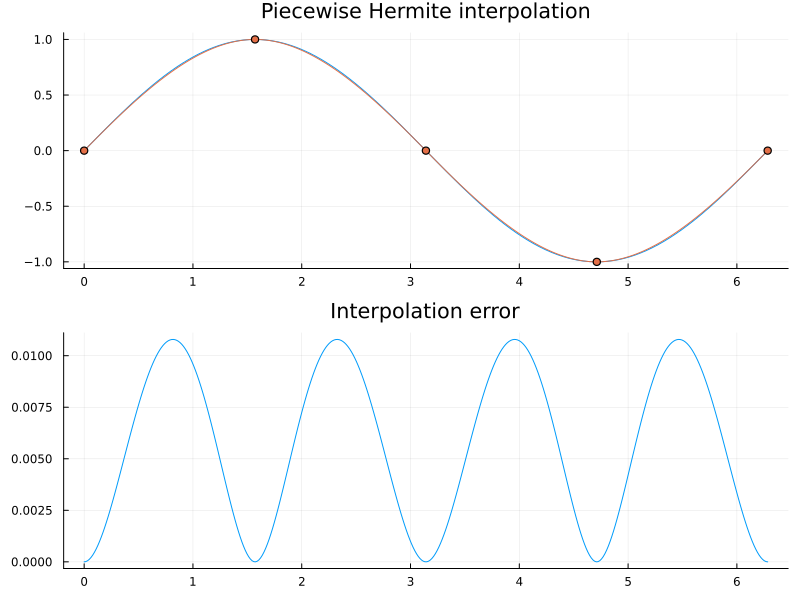

In [20]:
piecewiseHermite_sinplot(4)

---

## Cubic Hermite error bound

Using the Newton interpolating form, we can write:

   $$p_i(x) = f[x_{i-1}] + f[x_{i-1},x_{i-1}](x-x_{i-1}) + f[x_{i-1},x_{i-1},x_i](x-x_{i-1})^2 + f[x_{i-1},x_{i-1},x_i,x_i](x-x_{i-1})^2(x-x_i)$$

In Section 10.7 of Ascher-Greif, it is mentioned that the error in polynomial interpolation of 10.5 extends "seamlessly" to the case of interpolating derivatives. Thus, we have

   $$\left|f(\bar x) - p_i(\bar x)\right| \leq \frac{\left\|f''''\right\|}{4!} \max_{x \in [x_{i-1},x_i]} (x-x_{i-1})^2(x-x_i)^2, \quad \bar x \in [x_{i-1},x_i].$$

Letting $g(x) = (x-x_{i-1})^2(x-x_i)^2$, we want to solve

   $$\max_{x \in [x_{i-1},x_i]} g(x).$$

   Let's do this using `SymPy`. For clarity, we will use $a = x_{i-1}$ and $b = x_i$. Note that $a < b$.

In [9]:
import SymPy

x, a, b = SymPy.symbols("x a b")

g = (x - a)^2*(x - b)^2

        2         2
(-a + x) ⋅(-b + x) 

Now we compute $g'(x)$ and solve $g'(x) = 0$.

In [10]:
gp = SymPy.diff(g, x)

                     2           2             
(-2⋅a + 2⋅x)⋅(-b + x)  + (-a + x) ⋅(-2⋅b + 2⋅x)

In [11]:
sols = SymPy.solve(gp, x)

3-element Vector{SymPyCore.Sym{PyCall.PyObject}}:
         a
         b
 a/2 + b/2

Since $g'$ is a cubic polynomial, there are three solutions. It appears that the third solution is the one that maximizes $g$, since $g(a) = g(b) = 0$.

Let's substitute the third solution into $g$.

In [12]:
x̄ = sols[3]

a   b
─ + ─
2   2

In [13]:
SymPy.subs(g, x, x̄)

         2        2
⎛  a   b⎞  ⎛a   b⎞ 
⎜- ─ + ─⎟ ⋅⎜─ - ─⎟ 
⎝  2   2⎠  ⎝2   2⎠ 

In [16]:
SymPy.simplify(SymPy.subs(g, x, x̄))

       4
(a - b) 
────────
   16   

Let's check that $g''(x^*) < 0$.

In [17]:
gpp = SymPy.diff(gp, x)

                                        2             2
2⋅(-2⋅a + 2⋅x)⋅(-2⋅b + 2⋅x) + 2⋅(-a + x)  + 2⋅(-b + x) 

In [18]:
SymPy.simplify(SymPy.subs(gpp, x, x̄))

        2
-(a - b) 

Thus, $g''(x^*) = -(a-b)^2 < 0$, so the maximum value of $g$ is $(b-a)^4/16$.

Therefore, for $\bar x \in [x_{i-1},x_i]$, we have

$$
\begin{align}
\left|f(\bar x) - p_i(\bar x)\right| 
&\leq \frac{\left\|f''''\right\|}{4!} \max_{x \in [x_{i-1},x_i]} (x-x_{i-1})^2(x-x_i)^2\\
& = \frac{\left\|f''''\right\|}{4!} \frac{1}{16}(x_i - x_{i-1})^4.\\
\end{align}
$$

In [19]:
factorial(4)*16

384

If we again let 

$$h = \max_{1 \leq i \leq n} (x_i - x_{i-1}),$$

then we have 

$$
\left|f(\bar x) - p_i(\bar x)\right| \leq \frac{h^4}{384} \left\|f''''\right\|, 
\quad \bar x \in [x_{i-1}, x_i].
$$

This bound is valid for all subitervals $[x_{i-1}, x_i]$, so we have

$$
\left|f(x) - p(x)\right| \leq \frac{h^4}{384} \left\|f''''\right\|, 
\quad x \in [a, b].
$$

Summarizing, we have the following result.

> ## Theorem: (Piecewise cubic Hermite error bound)
>
> Let 
> - $f \in C^4[a,b]$,
> - $\left\|f''''\right\| = \max_{\xi \in [a,b]} \left|f''''(\xi)\right|$,
> - $a = x_0 < x_1 < \cdots < x_n = b$,
> - $p$ be the piecewise cubic Hermite function described above.
>
> If
>
> $$h = \max_{1 \leq i \leq n} (x_i - x_{i-1})$$
>
> is the maximum subinterval length, then
>
> $$\left|f(x) - p(x)\right| \leq \frac{h^4}{384} \left\|f''''\right\|, \quad \forall x \in [a,b].$$
>
> If, in addition, the points $x_0,\ldots,x_n$ are evenly spaced, then $h = (b-a)/n$, so
>
> $$\left|f(x) - p(x)\right| = \mathcal{O}\left(\frac{1}{n^4}\right).$$

## Example

For $f(x) = \sin(x)$ we have $f''''(x) = \sin(x)$, so $\left\|f''''\right\| = 1$. Dividing the interval $[0, 2\pi]$ into $4$ subintervals, we have 

$$h = \frac{2\pi}{4} = \frac{\pi}{2}.$$

Above, we observed a maximum interpolation error of

$$0.010790399394810635\ldots$$

The above error bound evaluates to 

$$\frac{h^4}{384} \left\|f''''\right\| = \frac{\pi^4}{2^4 \cdot 384} = 0.0158543442438155 \ldots$$




maximum error = 0.010790399394810635


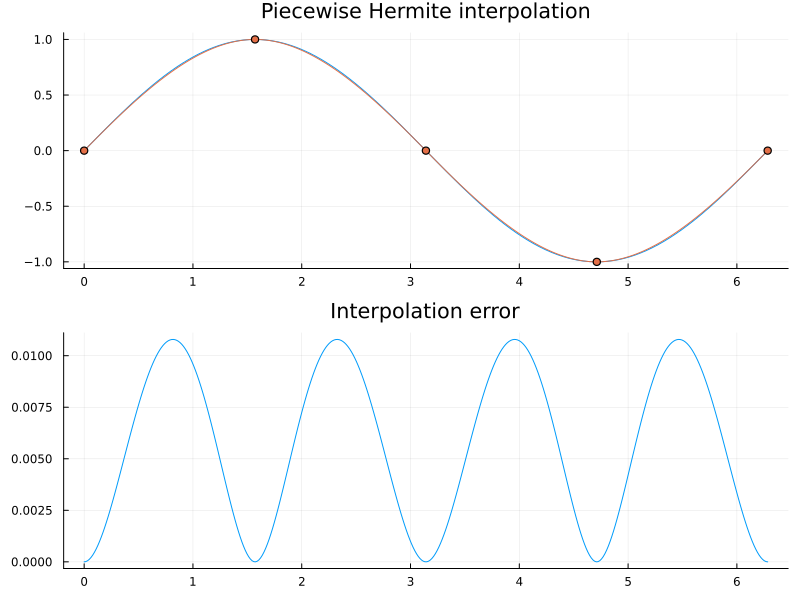

In [22]:
piecewiseHermite_sinplot(4)

In [21]:
π^4/(384*2^4)

0.0158543442438155

---